In [1]:
import pandas as pd
df = pd.read_csv('spotify_df_after_eda_7.2.25.csv')
df1 = pd.read_csv('spotify_df1_after_eda_7.2.25.csv')
df = pd.read_pickle('spotify_df_after_eda_7.2.25.pkl')
df1 = pd.read_pickle('spotify_df1_after_eda_7.2.25.pkl')

In [3]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,r&b,0.582,0.704,5,-6.242,...,0.065100,0.000000,0.2120,0.698,150.863,1,2018,1,3.288100,
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,rock,0.303,0.880,9,-4.739,...,0.011700,0.009940,0.3470,0.404,135.225,1,2017,11,6.225200,feel alive
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,pop,0.659,0.794,10,-5.644,...,0.000761,0.132000,0.3220,0.852,128.041,1,2015,7,3.809417,liquid blue
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,pop,0.662,0.838,1,-6.300,...,0.114000,0.000697,0.0881,0.496,129.884,1,2018,11,3.938467,fever
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,latin,0.836,0.799,7,-4.247,...,0.187000,0.000000,0.0920,0.772,94.033,1,2018,1,3.627550,acuerdo


In [5]:
#check
import pandas as pd
from langdetect import detect, LangDetectException
import string

# List of common linking words (for simplicity, add more if needed)
linking_words = set([
    'the', 'and', 'is', 'to', 'in', 'a', 'of', 'for', 'on', 'with', 'at', 'by', 'an', 'this', 'that'
])

# Function to clean the song title by removing punctuation and linking words
def clean_text(song):
    # Remove punctuation
    song = song.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase and remove linking words
    song_words = song.lower().split()
    cleaned_song = " ".join([word for word in song_words if word not in linking_words])
    
    return cleaned_song

# Function to detect if the song title is in English
def is_english(song):
    try:
        # Clean the song title first
        cleaned_song = clean_text(song)
        
        # Detect the language of the cleaned song title
        language = detect(cleaned_song)
        
        # Check if the detected language is English ('en')
        return 1 if language == 'en' else 0
    except LangDetectException:
        # In case of error in language detection (e.g., too short text)
        return 0

# Apply the function to df['track_name'] to create a new column 'english_track_name'
df['english_track_name'] = df['track_name'].apply(is_english)
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name,english_track_name
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,r&b,0.582,0.704,5,-6.242,...,0.000000,0.2120,0.698,150.863,1,2018,1,3.288100,,0
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,rock,0.303,0.880,9,-4.739,...,0.009940,0.3470,0.404,135.225,1,2017,11,6.225200,feel alive,0
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,pop,0.659,0.794,10,-5.644,...,0.132000,0.3220,0.852,128.041,1,2015,7,3.809417,liquid blue,0
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,pop,0.662,0.838,1,-6.300,...,0.000697,0.0881,0.496,129.884,1,2018,11,3.938467,fever,0
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,latin,0.836,0.799,7,-4.247,...,0.000000,0.0920,0.772,94.033,1,2018,1,3.627550,acuerdo,0


In [7]:
import pandas as pd

# Assuming your DataFrame is named df
unique_values = df['english_track_name'].unique()

# To display the unique values
print(unique_values)


[0 1]


In [9]:
# Count the occurrences of 0 and 1 in the 'english_track_name' column
value_counts = df['english_track_name'].value_counts()

print(value_counts)


english_track_name
0    16898
1     5471
Name: count, dtype: int64


In [ ]:
#Takes a lot of time
import pandas as pd
from langdetect import detect, LangDetectException
from googletrans import Translator, LANGUAGES

# Function to detect if the song title is in English
def is_english(song):
    try:
        # Detect the language of the song title
        language = detect(song)
        
        # Check if the detected language is English ('en')
        return language == 'en'
    except LangDetectException:
        # In case of error in language detection (e.g., too short text)
        return False

# Function to translate song title to English if it's not in English
def translate_to_english(song):
    # Check if the song is empty or None
    if not song:
        return song
    
    try:
        if is_english(song):
            return song  # Return the song if it is already in English
        
        translator = Translator()
        translated = translator.translate(song, src='auto', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating song title: {song}. Error: {e}")
        return song  # Return original song title in case of error

# Apply the translation function to df['track_name']
df['track_name'] = df['track_name'].apply(translate_to_english)

In [11]:
# WORD CLOUD

In [13]:
#creating a word cloud using costumers reviews

<class 'pandas.core.series.Series'>
Index: 22369 entries, 25675 to 12608
Series name: track_name
Non-Null Count  Dtype 
--------------  ----- 
22369 non-null  string
dtypes: string(1)
memory usage: 349.5 KB


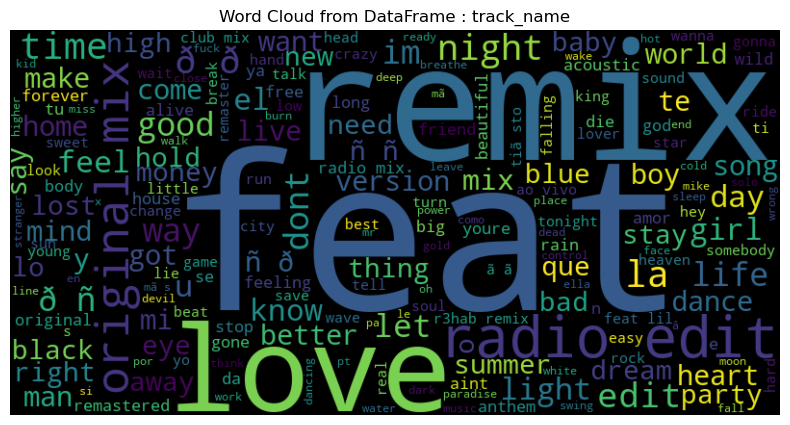

In [15]:
import nltk
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#loading the text_df
text=df['track_name'].astype('string')
text
text.info()
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_name")
plt.show()

In [17]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name,english_track_name
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,r&b,0.582,0.704,5,-6.242,...,0.000000,0.2120,0.698,150.863,1,2018,1,3.288100,,0
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,rock,0.303,0.880,9,-4.739,...,0.009940,0.3470,0.404,135.225,1,2017,11,6.225200,feel alive,0
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,pop,0.659,0.794,10,-5.644,...,0.132000,0.3220,0.852,128.041,1,2015,7,3.809417,liquid blue,0
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,pop,0.662,0.838,1,-6.300,...,0.000697,0.0881,0.496,129.884,1,2018,11,3.938467,fever,0
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,latin,0.836,0.799,7,-4.247,...,0.000000,0.0920,0.772,94.033,1,2018,1,3.627550,acuerdo,0


In [19]:
df1.head()

,track_name,track_album_name,playlist_name,playlist_subgenre
12644,pangarap,trip,pinoy classic rock,classic rock
25675,,,groovy funky neosoul,neo soul
15061,feel alive,love loss,hard rock workout,hard rock
2887,liquid blue,liquid blue,electropop pop,electropop
1029,fever,fever,best 2019 dance pop japan,dance pop


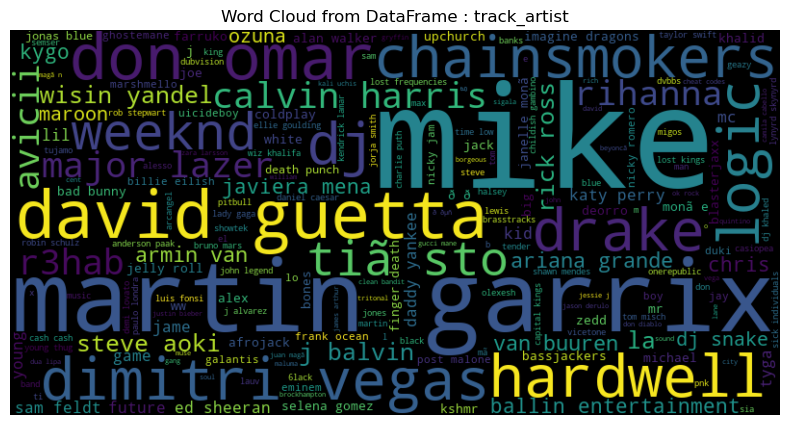

In [21]:
#loading the text_df
text=df['track_artist'].astype('string')
text
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_artist")
plt.show()

Top 5 common words in track_artist: ['mike', 'martin garrix', 'david guetta', 'don omar', 'dimitri vegas']
           track_artist  Top 5 words in artist
25675              rika                      0
15061     steady rollin                      0
2887   themadpixproject                      0
1029          yosa taar                      0
19866           thalã­a                      0


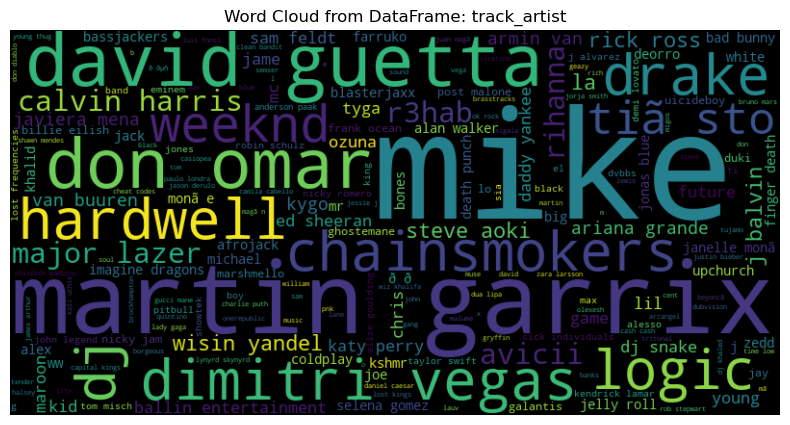

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the text data (track_artist column)
text = df['track_artist'].astype('string')

# Function to clean the text by removing punctuation and stopwords
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords by filtering out common linking words
    text = " ".join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS])
    return text

# Clean the text data
cleaned_text = text.apply(clean_text)

# Concatenate all artist names into a single string
text_data = cleaned_text.str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Get the most common words
word_freq = wordcloud.process_text(text_data)
top_5_words = sorted(word_freq, key=word_freq.get, reverse=True)[:5]

# Print top 5 words to verify
print("Top 5 common words in track_artist:", top_5_words)

# Function to check if any of the top 5 words appear in the artist's name
def contains_top_5_words(artist_name, top_words):
    artist_name = artist_name.lower()
    return any(word.lower() in artist_name for word in top_words)

# Create a new column "Top 5 words in artist" and apply the function
df['Top 5 words in artist'] = df['track_artist'].apply(lambda x: 1 if contains_top_5_words(x, top_5_words) else 0)

# Print the first few rows to confirm the new column has been added
print(df[['track_artist', 'Top 5 words in artist']].head())

# Plot the word cloud for track_artist
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame: track_artist")
plt.show()

Top 5 common words in track_name: ['feat', 'remix', 'love', 'radio edit', 'original mix']
        track_name  Top 5 words in track
25675                                  0
15061   feel alive                     0
2887   liquid blue                     0
1029         fever                     0
19866      acuerdo                     0


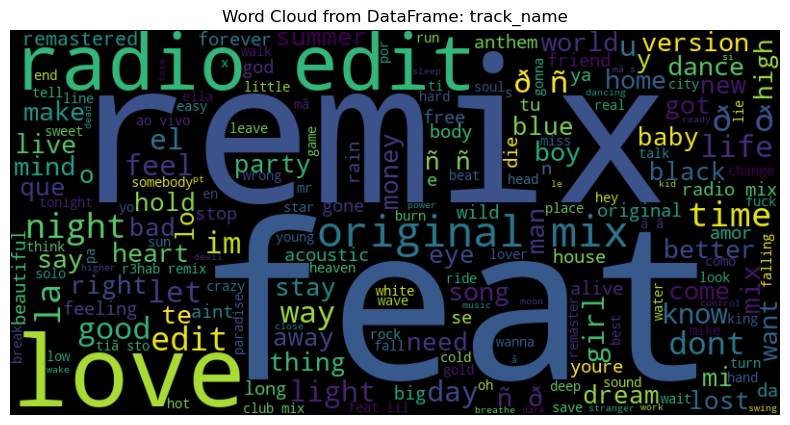

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the text data (track_name column)
text = df['track_name'].astype('string')

# Function to clean the text by removing punctuation and stopwords
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords by filtering out common linking words
    text = " ".join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS])
    return text

# Clean the text data
cleaned_text = text.apply(clean_text)

# Concatenate all track names into a single string
text_data = cleaned_text.str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Get the most common words
word_freq = wordcloud.process_text(text_data)
top_5_words = sorted(word_freq, key=word_freq.get, reverse=True)[:5]

# Print top 5 words to verify
print("Top 5 common words in track_name:", top_5_words)

# Function to check if any of the top 5 words appear in the track's name
def contains_top_5_words(track_name, top_words):
    track_name = track_name.lower()
    return any(word.lower() in track_name for word in top_words)

# Create a new column "Top 5 words in track" and apply the function
df['Top 5 words in track'] = df['track_name'].apply(lambda x: 1 if contains_top_5_words(x, top_5_words) else 0)

# Print the first few rows to confirm the new column has been added
print(df[['track_name', 'Top 5 words in track']].head())

# Plot the word cloud for track_name
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame: track_name")
plt.show()


In [29]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,...,valence,tempo,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name,english_track_name,Top 5 words in artist,Top 5 words in track
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,r&b,0.582,0.704,5,-6.242,...,0.698,150.863,1,2018,1,3.288100,,0,0,0
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,rock,0.303,0.880,9,-4.739,...,0.404,135.225,1,2017,11,6.225200,feel alive,0,0,0
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,pop,0.659,0.794,10,-5.644,...,0.852,128.041,1,2015,7,3.809417,liquid blue,0,0,0
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,pop,0.662,0.838,1,-6.300,...,0.496,129.884,1,2018,11,3.938467,fever,0,0,0
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,latin,0.836,0.799,7,-4.247,...,0.772,94.033,1,2018,1,3.627550,acuerdo,0,0,0


In [31]:
from sklearn.linear_model import Lasso
import pandas as pd

# Define the features (excluding 'year_track_album_release_date' and 'count_playlist_genre')
X = df[['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_minutes',
    'track_album_release_year','track_album_release_month']]  # Feature matrix (without 'year_track_album_release_date' and 'count_playlist_genre')

# Define the target
y = df['track_popularity']  # Target vector

# Fit the Lasso model
model = Lasso(alpha=0.01)
model.fit(X, y)

# Create a DataFrame to display the feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print feature coefficients
print(feature_coefficients)


                      Feature  Coefficient
9                     valence     5.155519
6                acousticness     3.920443
0                danceability     3.017657
3                    loudness     1.483005
12   track_album_release_year     1.400068
4                        mode     0.860736
13  track_album_release_month     0.154508
2                         key     0.023914
10                      tempo     0.015631
5                 speechiness    -1.402055
11           duration_minutes    -1.448509
8                    liveness    -1.873186
7            instrumentalness    -9.440311
1                      energy   -27.865003


In [35]:
from sklearn.linear_model import Lasso
import pandas as pd

# Define the features, excluding 'year_track_album_release_date' and 'count_playlist_genre'
X = df[['danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_minutes',
        'track_album_release_year','track_album_release_month']]  # Feature matrix excluding the unwanted columns

# Define the target
y = df['track_popularity']  # Target vector

# Fit the Lasso model
model = Lasso(alpha=0.01)
model.fit(X, y)

# Create a DataFrame to display the feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print feature coefficients
print(feature_coefficients)


                      Feature  Coefficient
9                     valence     5.155519
6                acousticness     3.920443
0                danceability     3.017657
3                    loudness     1.483005
12   track_album_release_year     1.400068
4                        mode     0.860736
13  track_album_release_month     0.154508
2                         key     0.023914
10                      tempo     0.015631
5                 speechiness    -1.402055
11           duration_minutes    -1.448509
8                    liveness    -1.873186
7            instrumentalness    -9.440311
1                      energy   -27.865003


In [37]:
#artist_type

In [39]:
import pandas as pd
import re
import nltk
from nltk.corpus import names
from sklearn.preprocessing import LabelEncoder

# Download names data from nltk
nltk.download('names')

# Load male and female names
male_names = set(names.words('male.txt'))
female_names = set(names.words('female.txt'))

# List of band-related keywords
band_keywords = ["band", "orchestra", "quartet", "group", "ensemble", "choir", "collective", "crew", "the"]

# Function to classify the artist type
def classify_artist(artist_name):
    artist_name_lower = artist_name.lower()  # Convert artist name to lowercase

    # Check if the artist is a band based on keywords or "&" or "and" in the name
    if any(keyword in artist_name_lower for keyword in band_keywords) or "&" in artist_name or " and " in artist_name_lower:
        return "Band"
    
    # Handle edge case: if artist name is empty or consists of just one word
    if len(artist_name.split()) == 0:
        return "Male"  # Treat "Unknown" as "Male" (or you could choose another classification)
    
    # Check the first name to classify as male or female
    first_name = artist_name.split()[0].capitalize()  # Get the first name and capitalize it
    if first_name in female_names:
        return "Female"
    if first_name in male_names:
        return "Male"
    
    # If the name does not match any male/female, return "Male" to classify as male
    return "Male"  # Treat any unknown artist as "Male" (or you could handle this differently)

# Assuming df is your DataFrame that already contains 'track_artist' column
# Apply the classify_artist function to the 'track_artist' column to create a new 'track_artist_type' column
df['track_artist_type'] = df['track_artist'].apply(classify_artist)

# Apply Label Encoding to the 'track_artist_type' column
label_encoder = LabelEncoder()
df['artist_type_encoded'] = label_encoder.fit_transform(df['track_artist_type'])

# Drop the 'track_artist_type' column if you no longer need it
df.drop(columns=['track_artist_type'], inplace=True)

# Check the unique values after encoding and print the counts
print(df['artist_type_encoded'].unique())  # Should show only [0, 1, 2] (Male, Female, Band)
print(df['artist_type_encoded'].value_counts())  # Count of 0s, 1s, and 2s


[2 0 1]
artist_type_encoded
2    19297
1     2813
0      259
Name: count, dtype: int64


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\info\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [41]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,...,tempo,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name,english_track_name,Top 5 words in artist,Top 5 words in track,artist_type_encoded
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,r&b,0.582,0.704,5,-6.242,...,150.863,1,2018,1,3.288100,,0,0,0,2
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,rock,0.303,0.880,9,-4.739,...,135.225,1,2017,11,6.225200,feel alive,0,0,0,2
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,pop,0.659,0.794,10,-5.644,...,128.041,1,2015,7,3.809417,liquid blue,0,0,0,0
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,pop,0.662,0.838,1,-6.300,...,129.884,1,2018,11,3.938467,fever,0,0,0,2
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,latin,0.836,0.799,7,-4.247,...,94.033,1,2018,1,3.627550,acuerdo,0,0,0,2


In [43]:
# Assuming the column 'Top 5 words in artist' exists in your dataframe 'df'
# Get the value counts of the 'Top 5 words in artist' column
top_artist_type_encoded = df['artist_type_encoded'].value_counts()

# Print the value counts
print(top_artist_type_encoded)


artist_type_encoded
2    19297
1     2813
0      259
Name: count, dtype: int64


In [47]:
# Assuming the column 'Top 5 words in artist' exists in your dataframe 'df'
# Get the value counts of the 'Top 5 words in artist' column
top_artist_type_encoded = df['artist_type_encoded'].value_counts()

# Print the value counts
print(top_artist_type_encoded)


artist_type_encoded
2    19297
1     2813
0      259
Name: count, dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'playlist_genre' column and create a new encoded column
df['playlist_genre_encoded'] = label_encoder.fit_transform(df['playlist_genre'])

# Remove the original 'playlist_genre' column
df = df.drop(columns=['playlist_genre'])

# Display the DataFrame with the new encoded column
print(df)


                     track_id          track_artist  track_popularity  \
25675  002xjhwzex66owfv2ip9dk                  rika                15   
15061  004s3t0onylzxii9plgu6z         steady rollin                28   
2887   008mcet31rotuanskuzy3l      themadpixproject                24   
1029   008rk8f6zxspzt4bulkiqg             yosa taar                38   
19866  00epienx1jfjff8sc6bccd               thalã­a                12   
...                       ...                   ...               ...   
22211  7zxrmhxxjmqceddg0rkavo                   nav                72   
24247  7zylobyw4qukqdyzob4j0y             father mc                36   
3793   7zycspvjdcqh6yt1fel2ky           nicki minaj                49   
26767  7zye9v6b785efwefys13c2  ponderosa twins plus                40   
12608  7zzzmpw8l66zpjh1m6qmos            moonstar88                61   

               track_album_id             playlist_id  danceability  energy  \
25675  1ficfunzmay1qknp15slzm  0jmbb9hfrzdiz

In [59]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,playlist_count_per_track,track_album_release_year,track_album_release_month,duration_minutes,track_name,english_track_name,Top 5 words in artist,Top 5 words in track,artist_type_encoded,playlist_genre_encoded
25675,002xjhwzex66owfv2ip9dk,rika,15,1ficfunzmay1qknp15slzm,0jmbb9hfrzdizopvrdv8ns,0.582,0.704,5,-6.242,1,...,1,2018,1,3.288100,,0,0,0,2,3
15061,004s3t0onylzxii9plgu6z,steady rollin,28,3z04lb9dsilqw68sht6jlb,3youf0u7wajnolytf9jcxf,0.303,0.880,9,-4.739,1,...,1,2017,11,6.225200,feel alive,0,0,0,2,5
2887,008mcet31rotuanskuzy3l,themadpixproject,24,1z4anbvuhtls6dprlp0m1q,5tiihps0hncyq6ijvknzqs,0.659,0.794,10,-5.644,0,...,1,2015,7,3.809417,liquid blue,0,0,0,0,2
1029,008rk8f6zxspzt4bulkiqg,yosa taar,38,2buym9uckvi0ydxs5jkwt0,37i9dqzf1dxdotzgkonflm,0.662,0.838,1,-6.300,1,...,1,2018,11,3.938467,fever,0,0,0,2,2
19866,00epienx1jfjff8sc6bccd,thalã­a,12,2phs92smy029jvpdfxupcc,3nh8aytdqnerbcrcg3dw9q,0.836,0.799,7,-4.247,0,...,1,2018,1,3.627550,acuerdo,0,0,0,2,1


In [53]:
df1.head()

,track_name,track_album_name,playlist_name,playlist_subgenre
12644,pangarap,trip,pinoy classic rock,classic rock
25675,,,groovy funky neosoul,neo soul
15061,feel alive,love loss,hard rock workout,hard rock
2887,liquid blue,liquid blue,electropop pop,electropop
1029,fever,fever,best 2019 dance pop japan,dance pop


In [49]:
# Save each DataFrame to its own pickle file
df.to_pickle('spotify_df_after_data_eng_df.pkl')
df1.to_pickle('spotify_df1_after_data_eng_df1.pkl')

# Save each DataFrame to its own CSV file
df.to_csv('spotify_df_after_eng_df.csv', index=False)
df1.to_csv('spotify_df_after_eng_df1.csv', index=False)

# Print confirmation message
print("Spotify dataset saved as pickle and CSV files for feature engineering.")

print("Spotify dataset saved as a pickle file-Feature Engineering.")

Spotify dataset saved as pickle and CSV files for feature engineering.
Spotify dataset saved as a pickle file-Feature Engineering.
